<a href="https://colab.research.google.com/github/luccidomingues/Comparing-classifiers/blob/main/Car_prices_comparing_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing Classifiers for Building Classification Models

In this Jupyter notebook, we will be comparing the performance of different classifiers for building classification models.

## 1. Import a dataset

### 1.1. Import library

In [ ]:
import pandas as pd

projects = 'car-prices.csv'
dataset = pd.read_csv(projects)
dataset

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [ ]:
to_change = {
    'no' : 0,
    'yes' : 1
}
dataset.sold = dataset.sold.map(to_change)
dataset.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
dataset = dataset.drop(columns = ["Unnamed: 0"], axis=1)
dataset.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [ ]:
X = dataset.drop(['sold'], axis=1)
Y = dataset.iloc[:,-1]
X

,mileage_per_year,model_year,price
0,21801,2000,30941.02
1,7843,1998,40557.96
2,7109,2006,89627.50
3,26823,2015,95276.14
4,7935,2014,117384.68
...,...,...,...
9995,15572,2006,97112.86
9996,13246,2002,107424.63
9997,13018,2014,93856.99
9998,10464,2011,51250.57


In [ ]:
# from sklearn.datasets import make_classification

### 1.2. Let's examine the data dimension

In [ ]:
X.shape

(10000, 3)

In [ ]:
Y.shape

(10000,)

## 2. Data split (80/20 ratio)

### 2.1. Import library

In [ ]:
from sklearn.model_selection import train_test_split

### 2.2. Data split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)



### 2.3. Let's examine the data dimension

In [ ]:
X_train.shape, Y_train.shape

((8000, 3), (8000,))

In [ ]:
X_test.shape, Y_test.shape

((2000, 3), (2000,))

## 3. Build Classification Models

Modified from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

### 3.1. Import modules

In [ ]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

### 3.2. Defining learning classifiers

In [ ]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

### 3.3. Build Model, Apply Model on Test Data & Record Accuracy Scores

In [ ]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
scores

[0.7325,
 0.73,
 0.7015,
 0.5625,
 0.4395,
 0.739,
 0.7765,
 0.7275,
 0.77,
 0.6815,
 0.7685,
 0.734,
 0.7345,
 0.6655]

## 4. Analysis of Model Performance

### 4.1. Import library

In [ ]:
import pandas as pd
import seaborn as sns

### 4.2. Create data frame of *model performance*

In [ ]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.7325
1,Linear_SVM,0.7300
2,Polynomial_SVM,0.7015
3,RBF_SVM,0.5625
4,Gaussian_Process,0.4395
5,Gradient_Boosting,0.7390
6,Decision_Tree,0.7765
7,Extra_Trees,0.7275
8,Random_Forest,0.7700
9,Neural_Net,0.6815


### 4.3. Adding colors to the data frame

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.732500
1,Linear_SVM,0.730000
2,Polynomial_SVM,0.701500
3,RBF_SVM,0.562500
4,Gaussian_Process,0.439500
5,Gradient_Boosting,0.739000
6,Decision_Tree,0.776500
7,Extra_Trees,0.727500
8,Random_Forest,0.770000
9,Neural_Net,0.681500


### 4.4. Bar plot of model performance

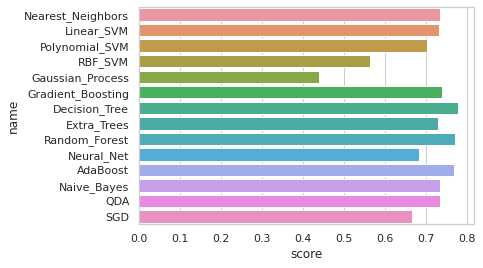

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

---